# 전국 공영 장례 조례 전처리 및 vectorDB 적재

In [9]:
import easyocr
import numpy as np
from pdf2image import convert_from_path


reader = easyocr.Reader(['ko', 'en'], gpu=True) 

pages = convert_from_path('../data/processed/ordinance_book/공영_서울인천경기_지원내용_복잡.pdf', dpi = 300)

if pages:
    image_np = np.array(pages[0])
    
result = reader.readtext(image_np)


In [10]:
result

[([[np.int32(963), np.int32(318)],
   [np.int32(1523), np.int32(318)],
   [np.int32(1523), np.int32(367)],
   [np.int32(963), np.int32(367)]],
  '(현행  제정) 2024.01.03. 제1671호',
  np.float64(0.5596805693267364)),
 ([[np.int32(910), np.int32(411)],
   [np.int32(1551), np.int32(411)],
   [np.int32(1551), np.int32(509)],
   [np.int32(910), np.int32(509)]],
  '서울특별시 성동구',
  np.float64(0.9752326989345133)),
 ([[np.int32(576), np.int32(522)],
   [np.int32(807), np.int32(522)],
   [np.int32(807), np.int32(615)],
   [np.int32(576), np.int32(615)]],
  '무연고',
  np.float64(0.8854432106018066)),
 ([[np.int32(834), np.int32(522)],
   [np.int32(1070), np.int32(522)],
   [np.int32(1070), np.int32(615)],
   [np.int32(834), np.int32(615)]],
  '사망자',
  np.float64(0.9996965544713919)),
 ([[np.int32(1095), np.int32(522)],
   [np.int32(1895), np.int32(522)],
   [np.int32(1895), np.int32(615)],
   [np.int32(1095), np.int32(615)]],
  '등 공영장례 지원 조례',
  np.float64(0.7609539398360067)),
 ([[np.int32(321), np.int3

In [11]:
height, width, _ = image_np.shape

ocr_data_list = []
start_trigger = False

for (bbox, text, prob) in result:
    (tl, tr, br, bl) = bbox
    center_x = (tl[0] + tr[0]) / 2 # 다음 이프문을 위해 중복 계산
    if text == "지원내용" and 270 * 1.5 <= center_x <= 274 * 1.5:
        start_trigger = True

    if not start_trigger:
        continue
    
    if text in ["권한의 위임", "장사시설", "지원신청 및 결정"] :
        break
    
    x1, x2 = int(tl[0]), int(tr[0])
    y1, y2 = int(tl[1]), int(bl[1])
    center_x = int((x1 + x2) / 2)
    center_y = int((y1 + y2) / 2)
    
    ocr_data_list.append({
        "text": text,
        "x1": x1, "x2": x2,
        "y1": y1, "y2": y2,
        "cx": center_x, 
        "cy": center_y,
        "used": False  # 사용자님 요청대로 사용 여부 체크
    })


ocr_data_list

[{'text': '지원내용',
  'x1': 323,
  'x2': 490,
  'y1': 1247,
  'y2': 1307,
  'cx': 406,
  'cy': 1277,
  'used': False},
 {'text': '1',
  'x1': 321,
  'x2': 347,
  'y1': 1341,
  'y2': 1375,
  'cx': 334,
  'cy': 1358,
  'used': False},
 {'text': '구청장은 공영장례들 위하여 예산의 범위에서 다음 사항울 지원할',
  'x1': 365,
  'x2': 1548,
  'y1': 1328,
  'y2': 1391,
  'cx': 956,
  'cy': 1359,
  'used': False},
 {'text': '수 있다:',
  'x1': 1561,
  'x2': 1714,
  'y1': 1331,
  'y2': 1388,
  'cx': 1637,
  'cy': 1359,
  'used': False},
 {'text': 'NEWS',
  'x1': 1016,
  'x2': 1143,
  'y1': 1436,
  'y2': 1480,
  'cx': 1079,
  'cy': 1458,
  'used': False},
 {'text': '50000',
  'x1': 953,
  'x2': 1001,
  'y1': 1616,
  'y2': 1632,
  'cx': 977,
  'cy': 1624,
  'used': False},
 {'text': '특수청소비용',
  'x1': 1363,
  'x2': 1577,
  'y1': 1651,
  'y2': 1700,
  'cx': 1470,
  'cy': 1675,
  'used': False},
 {'text': '연고자 확인올 위한',
  'x1': 856,
  'x2': 1177,
  'y1': 1701,
  'y2': 1750,
  'cx': 1016,
  'cy': 1725,
  'used': False},
 {'text': '동법 

In [33]:
ocr_data_list

[{'text': '지원내용',
  'x1': 219,
  'x2': 327,
  'y1': 833,
  'y2': 871,
  'cx': 273,
  'cy': 852,
  'used': True},
 {'text': '1',
  'x1': 217,
  'x2': 233,
  'y1': 895,
  'y2': 917,
  'cx': 225,
  'cy': 906,
  'used': True},
 {'text': '구청장은 공영장례흘 위하여 예산의 범위에서 다음 사항울 지원할',
  'x1': 245,
  'x2': 1033,
  'y1': 885,
  'y2': 927,
  'cx': 639,
  'cy': 906,
  'used': False},
 {'text': '수',
  'x1': 1042,
  'x2': 1068,
  'y1': 890,
  'y2': 922,
  'cx': 1055,
  'cy': 906,
  'used': True},
 {'text': '있다:',
  'x1': 1079,
  'x2': 1143,
  'y1': 889,
  'y2': 925,
  'cx': 1111,
  'cy': 907,
  'used': False},
 {'text': 'NEWS',
  'x1': 678,
  'x2': 762,
  'y1': 956,
  'y2': 988,
  'cx': 720,
  'cy': 972,
  'used': True},
 {'text': 'S7000',
  'x1': 636,
  'x2': 664,
  'y1': 1078,
  'y2': 1086,
  'cx': 650,
  'cy': 1082,
  'used': True},
 {'text': '특수청소비용',
  'x1': 910,
  'x2': 1052,
  'y1': 1102,
  'y2': 1134,
  'cx': 981,
  'cy': 1118,
  'used': True},
 {'text': '연고자 확인올 위한',
  'x1': 572,
  'x2': 784,
  'y

In [26]:
width
1653/21.8 * 0.6

45.49541284403669

In [12]:
lines_list = []

pre_data = None
line_num = 1
region_num = 1
ocr_data_list = ocr_data_list[1:].copy()
DPI_MUL = 1.5
# 200 DPI 기준 설정 후 400DPI 적용 시 2배 적용
MIN_COLUMN_GAP = 35 * DPI_MUL     # 띄어쓰기보다 훨씬 크면 컬럼 구분으로 생각하려고, 보통은 200DPI에서 10 ~ 15정도가 띄어쓰기임
LINE_GAP = 20 * DPI_MUL           # 줄 간격, 한 줄 내에서 많이 차이나면 10정도라서 그 두 배
CENTER_X_GAP = 5 * DPI_MUL        # text식별 박스의 x중앙값이 같은 컬럼이면 가운데 정렬이라 별 차이 안 나길래 일단 5 설정.
SOME_INT = 400 * DPI_MUL          # 이 값보다 크면 2번째 이상의 컬럼 text라고 판단할 임의의 값 지정

for idx, ocr_data in enumerate(ocr_data_list):
    # 이전 데이터 없으면 리스트에 딕셔너리 추가.
    if pre_data is None:
        lines_list.append({f'line{line_num}' : [ocr_data]})
        ocr_data['used'] = True
        pre_data = ocr_data
        continue

    # 리스트에 텍스트가 이미 들어갔다면 진행 안 함.
    if ocr_data['used'] == True:
        pre_data = ocr_data
        continue

    # 줄 바뀌지 않고, 이전 단어와 간격 작을 때는 이전 단어의 라인에 추가 (위치적으로 높으면 숫자 낮음)
    if (abs(pre_data['y1'] - ocr_data['y1']) <= LINE_GAP) and (ocr_data['x1'] - pre_data['x2'] < MIN_COLUMN_GAP):
        last_dict = lines_list[-1]
        current_key = list(last_dict.keys())[0]
        last_dict[current_key].append(ocr_data)
        pre_data = ocr_data
        continue

    # 1번째 구역 글이 처음 발견
    if (abs(pre_data['y1'] - ocr_data['y1']) > LINE_GAP) and (ocr_data_list[idx+1]['x1'] - ocr_data['x2'] >= MIN_COLUMN_GAP):
        lines_list.append({f'region{region_num}' : [ocr_data]})
        ocr_data['used'] = True

        for data in ocr_data_list: 
            if not data['used'] and abs(data['cx'] - ocr_data['cx']) <= CENTER_X_GAP:
                lines_list[-1][f'region{region_num}'].append(data)
                data['used'] = True

        region_num += 1
        pre_data = ocr_data
        continue

    # 2번째, 3번째, (있다면 4번째) 구역 글
    if (ocr_data['x1'] - pre_data['x2'] >= MIN_COLUMN_GAP) or (abs(pre_data['y1'] - ocr_data['y1']) > LINE_GAP and ocr_data['x1'] > SOME_INT) :
        lines_list.append({f'region{region_num}' : [ocr_data]})
        ocr_data['used'] = True

        for data in ocr_data_list: 
            if not data['used'] and abs(data['cx'] - ocr_data['cx']) <= CENTER_X_GAP:
                lines_list[-1][f'region{region_num}'].append(data)
                data['used'] = True

        region_num += 1
        pre_data = ocr_data
        continue

    # 줄 바뀌면 다음 라인으로 생성
    if abs(pre_data['y1'] - ocr_data['y1']) > LINE_GAP:
        lines_list.append({f'line{line_num}' : [ocr_data]})
        line_num += 1
        ocr_data['used'] = True
        pre_data = ocr_data
        continue    


In [13]:
final_lines_list = [
    " ".join([item['text'] for item in list(line_dict.values())[0]]) 
    for line_dict in lines_list
]

# 결과 확인
for line in final_lines_list:
    print(line)

1 구청장은 공영장례들 위하여 예산의 범위에서 다음 사항울 지원할 수 있다:
NEWS
50000
특수청소비용 동법 제4조에 따른 지원대상이 임차계약올 맞은 거주지에서 사망한 경우 지급)
연고자 확인올 위한 일간신문 공고료
기타 추모의식에 소요되논 비용 영안실 안치료 및 운구비
2 구청장은 공영장례 지원의 경우 고인의 종교 등올 고려할 수 있다:


### 시각화 해보기 (with 제미나이)

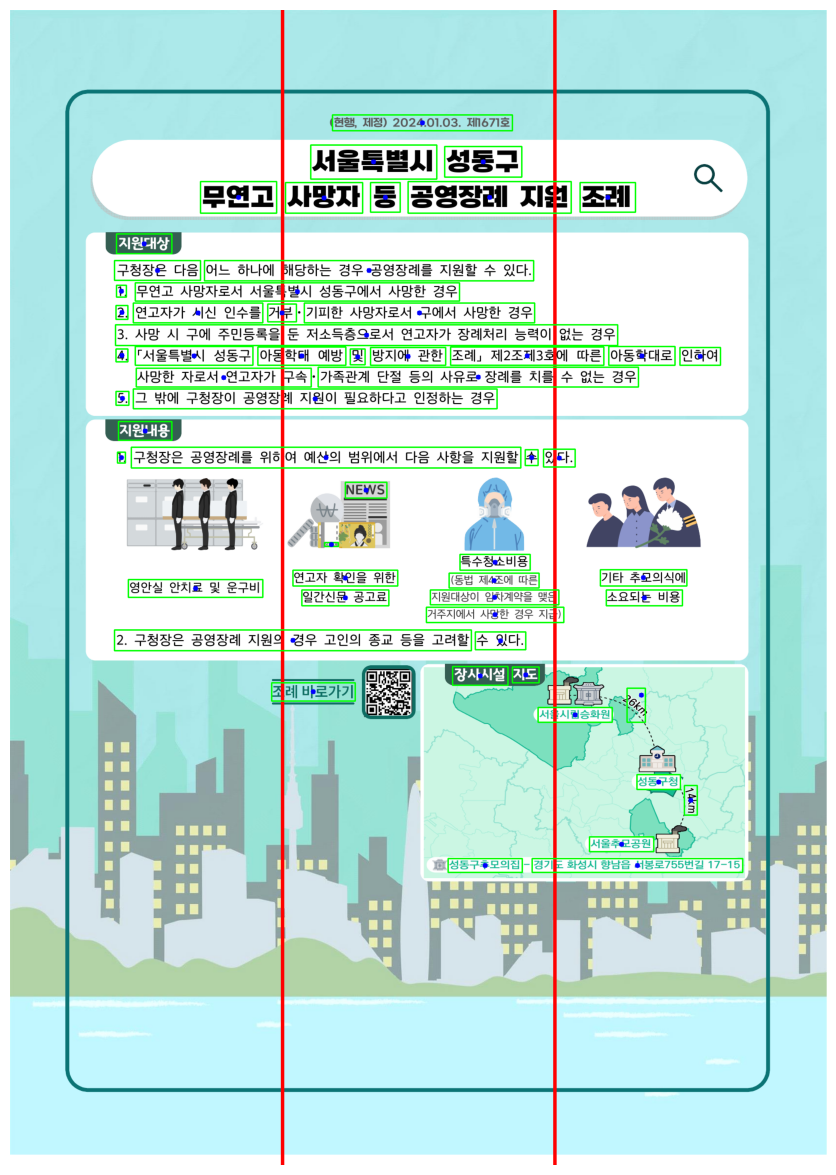

In [46]:
import matplotlib.pyplot as plt
import cv2

# 시각화를 위해 이미지 복사
debug_img = image_np.copy()
height, width, _ = debug_img.shape
threshold_1 = width / 3
threshold_2 = threshold_1 * 2
# 1. 내가 설정한 기준선(threshold) 그리기 (빨간선)
# 위에서 설정한 threshold_1, threshold_2 변수 사용
cv2.line(debug_img, (int(threshold_1), 0), (int(threshold_1), height), (255, 0, 0), 5) 
cv2.line(debug_img, (int(threshold_2), 0), (int(threshold_2), height), (255, 0, 0), 5)
# cv2.line(debug_img, (int(400), 0), (int(400), height), (255, 0, 0), 5)

# 2. OCR이 인식한 텍스트 박스 그리기 (초록박스)
for (bbox, text, prob) in result:
    (tl, tr, br, bl) = bbox
    
    # 박스 그리기
    pt1 = (int(tl[0]), int(tl[1]))
    pt2 = (int(br[0]), int(br[1]))
    cv2.rectangle(debug_img, pt1, pt2, (0, 255, 0), 2)
    
    # 텍스트 중심점 찍기 (파란점)
    center_x = int((tl[0] + tr[0]) / 2)
    center_y = int((tl[1] + bl[1]) / 2)
    cv2.circle(debug_img, (center_x, center_y), 5, (0, 0, 255), -1)

# 이미지 출력
plt.figure(figsize=(15, 15))
plt.imshow(debug_img)
plt.axis('off')
plt.show()

In [7]:
result

[([[np.int32(652), np.int32(212)],
   [np.int32(1016), np.int32(212)],
   [np.int32(1016), np.int32(244)],
   [np.int32(652), np.int32(244)]],
  '현행  제정) 2024.01.03. 제1671호',
  np.float64(0.4968716864801708)),
 ([[np.int32(608), np.int32(273)],
   [np.int32(863), np.int32(273)],
   [np.int32(863), np.int32(342)],
   [np.int32(608), np.int32(342)]],
  '서울특별시',
  np.float64(0.9824764632588374)),
 ([[np.int32(879), np.int32(276)],
   [np.int32(1035), np.int32(276)],
   [np.int32(1035), np.int32(338)],
   [np.int32(879), np.int32(338)]],
  '성동구',
  np.float64(0.999591875853089)),
 ([[np.int32(385), np.int32(347)],
   [np.int32(539), np.int32(347)],
   [np.int32(539), np.int32(411)],
   [np.int32(385), np.int32(411)]],
  '무연고',
  np.float64(0.8573444485664368)),
 ([[np.int32(557), np.int32(349)],
   [np.int32(713), np.int32(349)],
   [np.int32(713), np.int32(411)],
   [np.int32(557), np.int32(411)]],
  '사망자',
  np.float64(0.9931611411492176)),
 ([[np.int32(729), np.int32(349)],
   [np.int32